In [1]:
import matplotlib.pyplot as plt
from data.cifar import CIFAR20
from PIL import Image
import pandas as pd
import numpy as np

dataset = CIFAR20(train=True, transform=None, download=True)
dataset.data.shape, len(dataset.targets)

Files already downloaded and verified


((50000, 32, 32, 3), 50000)

In [2]:
pd.DataFrame(dataset.targets).describe()

,0
count,50000.000000
mean,9.500000
std,5.766339
min,0.000000
25%,4.750000
50%,9.500000
75%,14.250000
max,19.000000


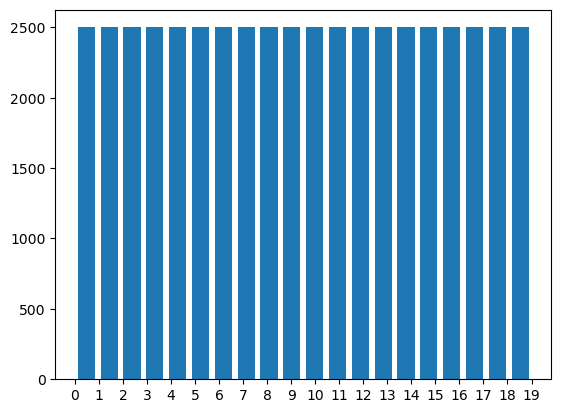

In [3]:
plt.hist(dataset.targets,len(set(dataset.targets)),rwidth=0.75)
plt.xticks([target for target in set(dataset.targets)],list(set(dataset.targets)))
plt.show()

In [4]:
img_sample = {"data":np.array([np.asarray(Image.open("./data/cifar_img_5109.jpeg"))]),
              "targets":[-1]}
img_sample["data"].shape, len(img_sample["targets"])

((1, 32, 32, 3), 1)

In [5]:
from sampleDataSet import SampleDataSet
from get_sample_img import get_pic
img_samples = np.array([np.asarray(Image.open("./data/cifar_img_5109.jpeg"))])
#np.array([np.asarray(get_pic(idx)[2]) for idx in range(128)])
#np.array([np.asarray(Image.open("./data/cifar_img_5109.jpeg"))])
img_dataset = SampleDataSet(img_samples,transform=None)

img_dataset.data.shape, len(img_dataset.targets)

Files already downloaded and verified
Files already downloaded and verified


((50001, 32, 32, 3), 50001)

In [6]:
pd.DataFrame(img_dataset.targets).describe()

,0
count,50001.000000
mean,9.500210
std,5.766472
min,0.000000
25%,5.000000
50%,10.000000
75%,15.000000
max,20.000000


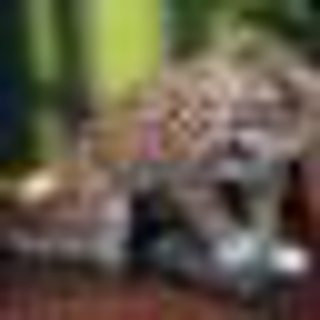

In [10]:
#Image.fromarray(dataset.data[1]).resize((320,320))
#Image.fromarray(img_dataset.data[1]).resize((320,320))
Image.fromarray(img_dataset.get_sample_image(0)).resize((320,320))
#Image.fromarray(img_dataset.get_image(1)).resize((320,320))
#img_dataset.get_sample(0)["image"]
#img_dataset[1]["image"]


In [ ]:
#data = np.load("./results/cifar-20/pretext/topk-single_img-neighbors.npy")
#data = np.load("./results/cifar-20/pretext/topk-val-neighbors.npy")
data = np.load("./results/cifar-20/pretext/topk-train-neighbors.npy")
data.shape

In [ ]:
df = pd.DataFrame(data, index = pd.Series([*range(data.shape[0])],name="DataSample"), columns=pd.Series([*range(data.shape[1])],name="KNN"))
df = df.drop(columns = df.columns[0])
df

In [ ]:
df.describe()

In [ ]:
from utils.common_config import get_model
import yaml

with open("configs/scan/scan_cifar20.yml", 'r') as stream:
    config_scan = yaml.safe_load(stream)
config_scan['batch_size'] = 1
scan = get_model(config_scan)


In [ ]:
from utils.common_config import get_train_dataset, get_train_transformations, get_train_dataloader

transforms = get_train_transformations(config_scan)
dataset = get_train_dataset(config_scan, transforms)
dataloader = get_train_dataloader(config_scan, dataset)
next(iter(dataloader))

In [ ]:
res = scan(next(iter(dataloader))["image"], forward_pass='return_all') 
res["features"]

In [ ]:
res["output"]

per sample:<br>
features (50000x128)<br>
cluster_assign (50000x5)  -> example: [0,15,80,210,350]<br>
cluster_head5 (50000x5)<br>
cluster_head20 (50000x20)   -> prob cluster assignment<br>
cluster_head100 (50000x100)<br>
cluster_head300 (50000x300)<br>
cluster_head500 (50000x500)